In [1]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [2]:
path=Path('data/')

In [3]:
path.ls()

[PosixPath('data/test'),
 PosixPath('data/valid'),
 PosixPath('data/train'),
 PosixPath('data/rawdata'),
 PosixPath('data/hge_97.pkl'),
 PosixPath('data/models')]

In [4]:
data=ImageDataBunch.from_folder (path,train='train',valid='valid', ds_tfms=get_transforms (), size=224)

In [5]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1474 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no_hge,no_hge,no_hge,no_hge,no_hge
Path: data;

Valid: LabelList (631 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no_hge,no_hge,no_hge,no_hge,no_hge
Path: data;

Test: None

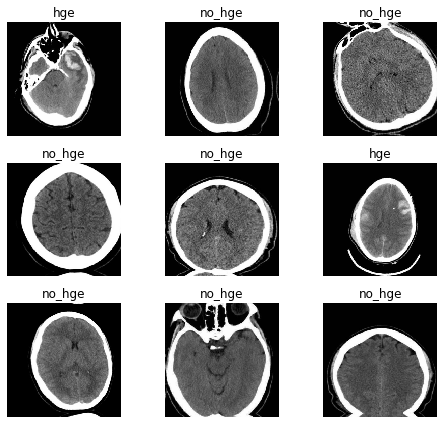

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)
len(data.classes),data.c

['hge', 'no_hge']


(2, 2)

In [8]:
learn = cnn_learner(data, models.resnet50, metrics= accuracy)

In [9]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.369724,0.370431,0.863708,00:13
1,0.221543,0.294532,0.912837,00:10
2,0.172452,0.133616,0.942948,00:11
3,0.131591,0.143132,0.939778,00:10
4,0.109851,0.101930,0.955626,00:11
5,0.092997,0.123203,0.944533,00:10
6,0.074439,0.113661,0.942948,00:10
7,0.067848,0.090288,0.955626,00:10
8,0.059481,0.094406,0.955626,00:11
9,0.052431,0.088769,0.955626,00:10


In [10]:
learn.save('hge_asnr2_model')

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

In [12]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

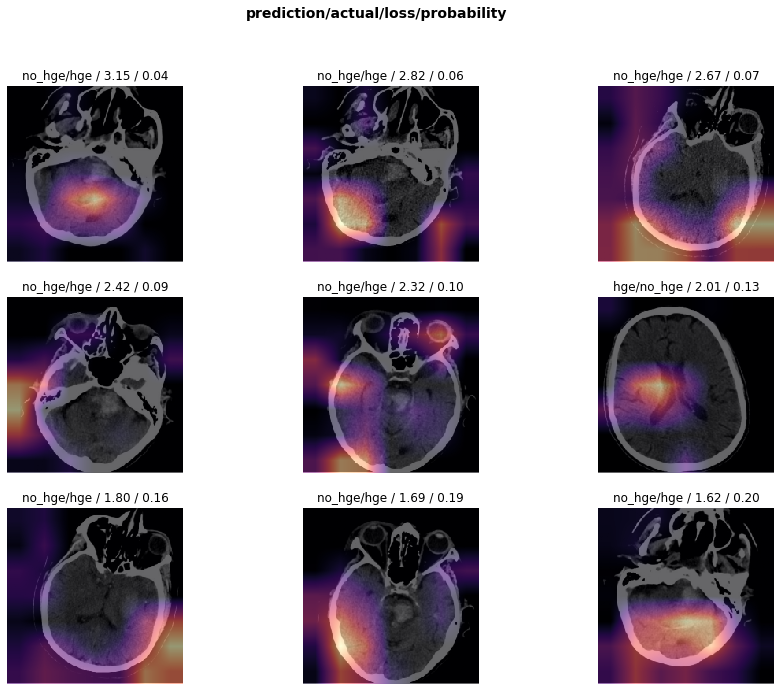

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

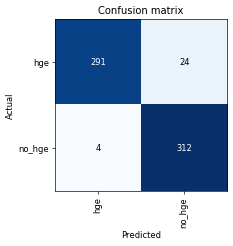

In [14]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.121481,0.083958,0.965135,00:13


In [17]:
learn.load('hge_asnr2_model');

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


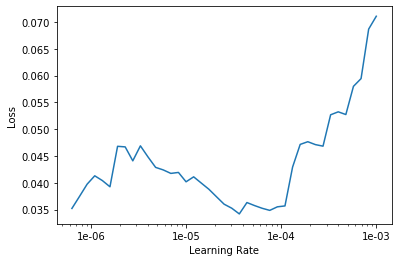

In [19]:
learn.recorder.plot()

In [21]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.020554,0.150671,0.950872,00:12
1,0.018580,0.096419,0.960380,00:12
2,0.018617,0.067737,0.974643,00:12


In [22]:
learn.export('hge_97_new.pkl')

In [23]:
learn.save('hge_model_97_new')

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

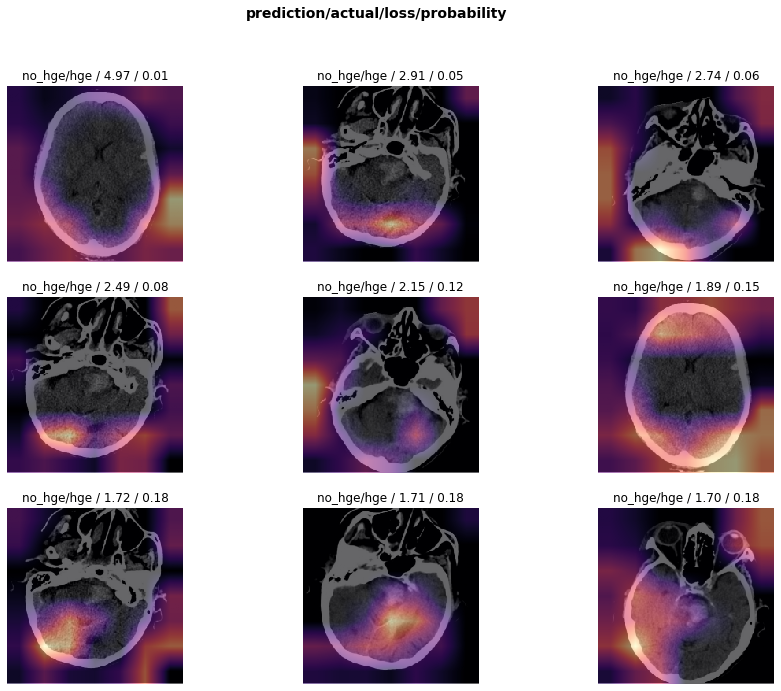

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

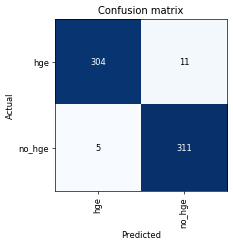

In [26]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [29]:
preds,y=learn.get_preds()

In [30]:
im=open_image('data/test/new12.tiff')

In [31]:
pred_class, pred_idx,outputs=learn.predict(im)

In [32]:
pred_class

Category no_hge

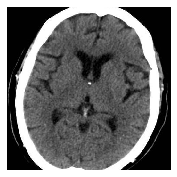

In [33]:
im.show()